,Entity,Code,Year,GDP per capita,Life expectancy
46,Equatorial Guinea,GNQ,2015,35743,57.359


,Entity,Code,Year,GDP per capita,Life expectancy
122,Russia,RUS,2015,23118,71.464


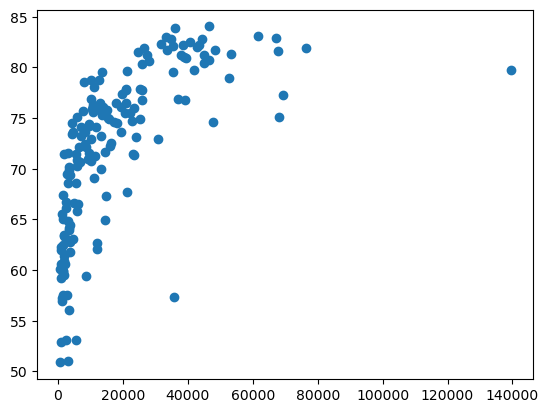

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
gdp = pd.read_csv("./datasets/GDP-2015.csv")
le = pd.read_csv("./datasets/life-expectancy.csv")
le = le[le["Year"] == 2015]
le = le.drop(columns = ["Code", "Year"])
gdp = gdp.merge(le, left_on="Entity", right_on="Entity")
x = np.array(gdp["GDP per capita"])
y = np.array(gdp["Life expectancy"])
world_index = gdp["Entity"].tolist().index("World")
gdp.drop([world_index, world_index+1])
plt.scatter(x,y)

lestd = np.std(gdp["Life expectancy"])
lemean = np.mean(gdp["Life expectancy"])

lol = gdp[gdp["Life expectancy"] <= lemean]
lol = lol[lol["GDP per capita"] >= 35000]
gdpmean = np.mean(gdp["GDP per capita"])
display(lol)
gdpmean

lol = gdp[gdp["Entity"] == "Russia"]
#lol = lol[lol["GDP per capita"] >= 120000]
lol